# Step 1: Import Libraries

In [33]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Step 2: Define Function to Fetch Historical Data



In [34]:
def get_stock_data(symbol, start_date, end_date):
    """
    Fetch historical stock data for the given symbol within the specified date range.
    """
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data = stock_data[['Close']]
    return stock_data

# Step 3: Define Function to Calculate Growth Rate (Slope) Using Linear Regression

In [35]:
def calculate_growth_rate(stock_data):
    """
    Calculate the growth rate (slope) for the given stock data using Linear Regression.
    """
    stock_data['Date'] = pd.to_datetime(stock_data.index)
    stock_data['Date_Ordinal'] = stock_data['Date'].map(pd.Timestamp.toordinal)

    X = stock_data['Date_Ordinal'].values.reshape(-1, 1)
    y = stock_data['Close'].values

    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]

    return slope

# Step 4: Define Function to Plot Stock Data

In [36]:
def plot_data(stock_data, stock2_data, stock_symbol, stock2_symbol):
    """
    Plot the stocks' data on the same graph.
    """
    plt.figure(figsize=(10, 6))

    plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Stock', color='blue')
    plt.plot(stock2_data.index, stock2_data['Close'], label=f'{stock2_symbol} Stock', color='red')

    plt.title(f'{stock_symbol} vs {stock2_symbol} Growth Comparison')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    plt.legend()

    plt.grid(True)
    plt.show()

# Step 5: Define the Main Function to Compare Growth Rates



In [37]:
def compare_growth_rates(stock_symbol, stock2_symbol, start_date, end_date):
    """
    Compare the growth rate (slope) of the stocks.
    """
    # Fetch historical data for the stocks
    stock_data = get_stock_data(stock_symbol, start_date, end_date)
    stock2_data = get_stock_data(stock2_symbol, start_date, end_date)

    # Calculate the growth rates (slopes)
    stock_growth_rate = calculate_growth_rate(stock_data)
    stock2_growth_rate = calculate_growth_rate(stock2_data)

    # Print the growth rates
    print(f'Growth Rate (Slope) of {stock_symbol}: {stock_growth_rate[0]:.4f}')
    print(f'Growth Rate (Slope) of {stock2_symbol}: {stock2_growth_rate[0]:.4f}')

    # Plot the data for visualization
    plot_data(stock_data, stock2_data, stock_symbol, stock2_symbol)

# Step 6: User Input and Running the Project

Enter the stock symbol (e.g., AAPL): AAPL
Enter the stock symbol (e.g., TSLA): TSLA
Enter the start date (YYYY-MM-DD): 2020-01-01
Enter the end date (YYYY-MM-DD): 2025-01-01


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Growth Rate (Slope) of AAPL: 0.0731
Growth Rate (Slope) of TSLA: 0.0687


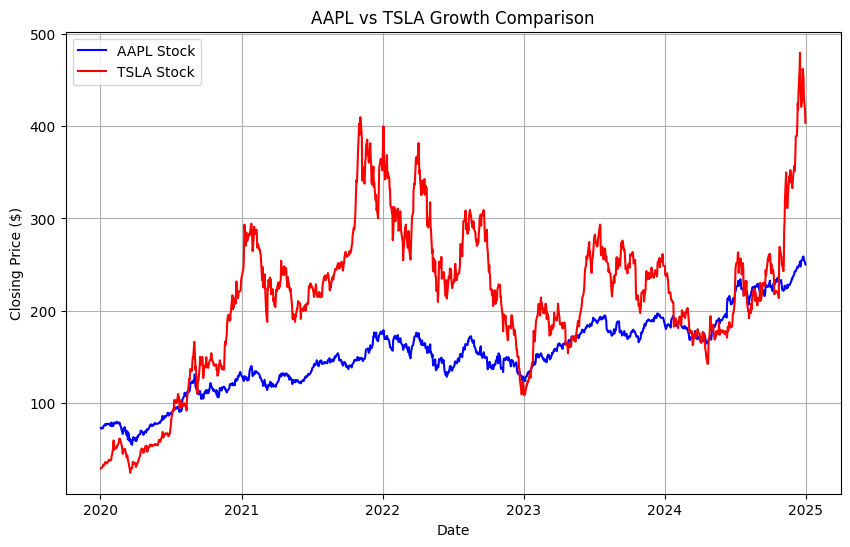

In [38]:
# Run the project
def run_project():
    # Ask the user for input
    stock_symbol = input("Enter the stock symbol (e.g., AAPL): ").strip().upper()
    stock2_symbol = input("Enter the stock symbol (e.g., TSLA): ").strip().upper()

    # Clean up and standardize the date format
    start_date = input("Enter the start date (YYYY-MM-DD): ").strip().replace("–", "-").replace("—", "-")
    end_date = input("Enter the end date (YYYY-MM-DD): ").strip().replace("–", "-").replace("—", "-")

    try:
        compare_growth_rates(stock_symbol, stock2_symbol, start_date, end_date)
    except Exception as e:
        print(f"\n[ERROR] {e}\nMake sure the symbols and dates are valid.")

run_project()